In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev
plt.rcParams.update({'font.size': 20})

# Curve 1

In [15]:
coordinates = [(0, 0), (27.5, 4), (57, 9), (75, 16), (87, 30), (94, 47), (85, 66), (70, 79), (60, 80), (45, 75), (35, 65), (29, 55), (26, 43), (30, 28), (38, 17), (52, 10), (75, 5), (100, 2), (125, 1), (159, 0.1)]

In [16]:
t, encabulation = [], []
for item in coordinates:
    t.append(item[0])
    encabulation.append(item[1])
t = np.array(t)/(np.max(t)/10)
encabulation = np.array(encabulation)/(np.max(encabulation))

In [17]:
tck, u = splprep([t, encabulation], s=0)
t1, encabulation1 = splev(np.linspace(0, 1, 1000),tck)

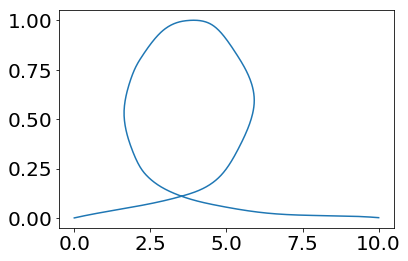

In [18]:
plt.plot(t1, encabulation1)

# Curve 2

In [19]:
coordinates = [(0, 0), (22, 2), (46, 6), (68, 14), (80, 22), (89, 41), (86, 60), (80, 69), (69, 72), (57, 69), (51, 63), (45, 52), (44, 46), (45, 40), (50, 33), (56, 32), (65, 35), (70, 41), (72, 50), (71, 59), (66, 67), (61, 70), (51, 70), (42, 66), (35, 56), (33, 42), (37, 27), (48, 17), (61, 12), (75, 7), (94, 4), (123, 1), (159, 0)]

In [20]:
t, encabulation = [], []
for item in coordinates:
    t.append(item[0])
    encabulation.append(item[1])
t = np.array(t)/(np.max(t)/10)
encabulation = np.array(encabulation)/(np.max(encabulation))

In [21]:
tck, u = splprep([t, encabulation], s=0)
t2, encabulation2 = splev(np.linspace(0, 1, 1000),tck)

# Plotting Curves

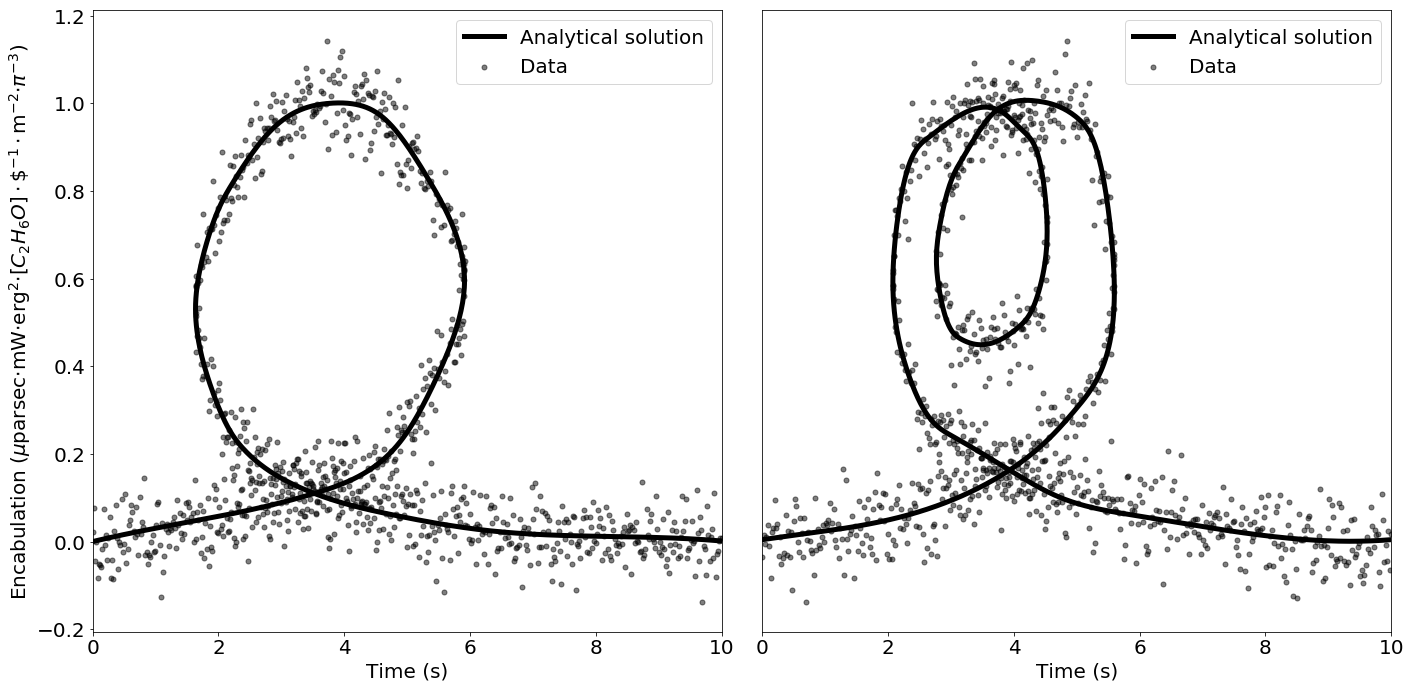

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].scatter(t1, encabulation1 + np.random.normal(0, 0.05, len(t1)), color='black', s=25, alpha=0.5, label='Data')
ax[1].scatter(t2, encabulation2 + np.random.normal(0, 0.05, len(t2)), color='black', s=25, alpha=0.5, label='Data')
ax[0].plot(t1, encabulation1, color='black', linewidth=5, label='Analytical solution')
ax[1].plot(t2, encabulation2, color='black', linewidth=5, label='Analytical solution')
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
ax[0].set_xlabel('Time (s)')
ax[1].set_xlabel('Time (s)')
ax[0].set_ylabel(r"Encabulation ($\mu$parsec$\cdot$mW$\cdot$erg$^2$$\cdot[C_2H_6O]\cdot$\$$^{-1}\cdot$m$^{-2}$$\cdot\pi^{-3}$)")
ax[0].set_xlim([0, 10])
ax[1].set_xlim([0, 10])
ax[1].set_yticks([])

plt.tight_layout()

# Saving Experiments

Experiments 1

In [26]:
noise = [0.05, 0.05, 0.1, 0.1, 0.4]
np.random.shuffle(noise)

In [27]:
for i, n in enumerate(noise):
    file = open('2022-02-30_experiment{}.txt'.format(i+1), 'w')
    file.write('date = 2022/02/30\n')
    file.write('apparatus = Rockwell Retro Encabulator\n')
    file.write('time encabulation\n')
    for j in range(len(t1)):
        if np.random.uniform(0, 1) > 0.98:
            file.write('dust\n')
            file.write('{:.4f} {:.4f}\n'.format(t1[j], encabulation1[j] + np.random.normal(0, n)))
        else:
            file.write('{:.4f} {:.4f}\n'.format(t1[j], encabulation1[j] + np.random.normal(0, n)))
    file.close()

Experiments 2: Have to be converted in .csv afterwards

In [ ]:
noise = [0.05, 0.05, 0.1, 0.1, 0.1]
np.random.shuffle(noise)

In [187]:
for i, n in enumerate(noise):
    file = open('2022-02-31_experiment{}.txt'.format(i+1), 'w')
    file.write('date = 2022/02/31\n')
    file.write('apparatus = Rockwell Micro Encabulator\n')
    file.write('time encabulation\n')
    for j in range(len(t1)):
        file.write('{:.4f} {:.4f}\n'.format(t2[j], encabulation2[j] + np.random.normal(0, n)))
    file.close()